In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pendulum
import geopandas as gpd
from dateutil.relativedelta import relativedelta

from skill import config
from skill import recorte
from skill import plot
from skill import clima
from skill import outros

In [2]:
dir_dados = config.dir_dados
dir_img = config.dir_img
dir_shp = config.dir_shp

In [3]:
br_madeira = gpd.read_file(f'{dir_shp}/brasil_madeira.shp')

In [4]:
ds = outros.download('cfsv2', 12)

/home/mvictor/miniconda3/envs/tcc/lib/python3.9/site-packages/xarray/coding/times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [5]:
ds_recortado = recorte.recortar(ds, br_madeira)

In [6]:
mes = ['', 'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro','Dezembro']

<GeoAxesSubplot:title={'left':'CI e CC: Dezembro','right':'Válido para Janeiro'}>

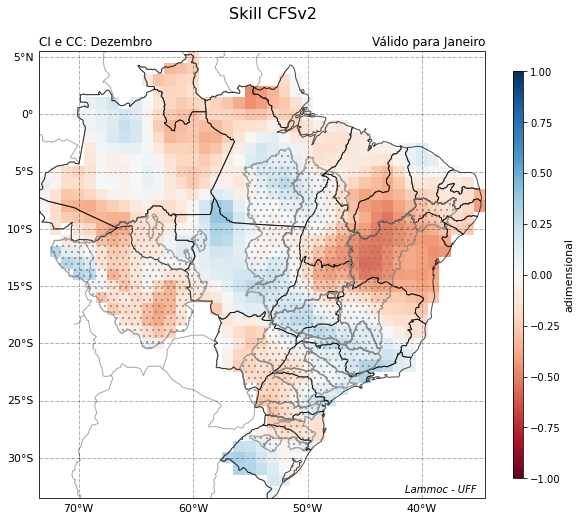

In [15]:
leads = ['sk1', 'sk2', 'sk3'] 
fig,ax = plt.subplots(1,1, figsize=(10,10), subplot_kw=dict(projection = ccrs.PlateCarree()))

plt.suptitle("Skill CFSv2", x=0.45, y=0.875, fontsize=16)
ax.set_title(f'CI e CC: {mes[12]}', loc='left')
ax.set_title(f'Válido para {mes[1]}', loc='right')
ax.text(-41.5,-33,'Lammoc - UFF', fontstyle='italic')

plot.plot_mesh(ax, ds_recortado[leads[0]].isel(time=0))